In [21]:
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Advanced DL/Ecommerce Customers_Kaggle.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


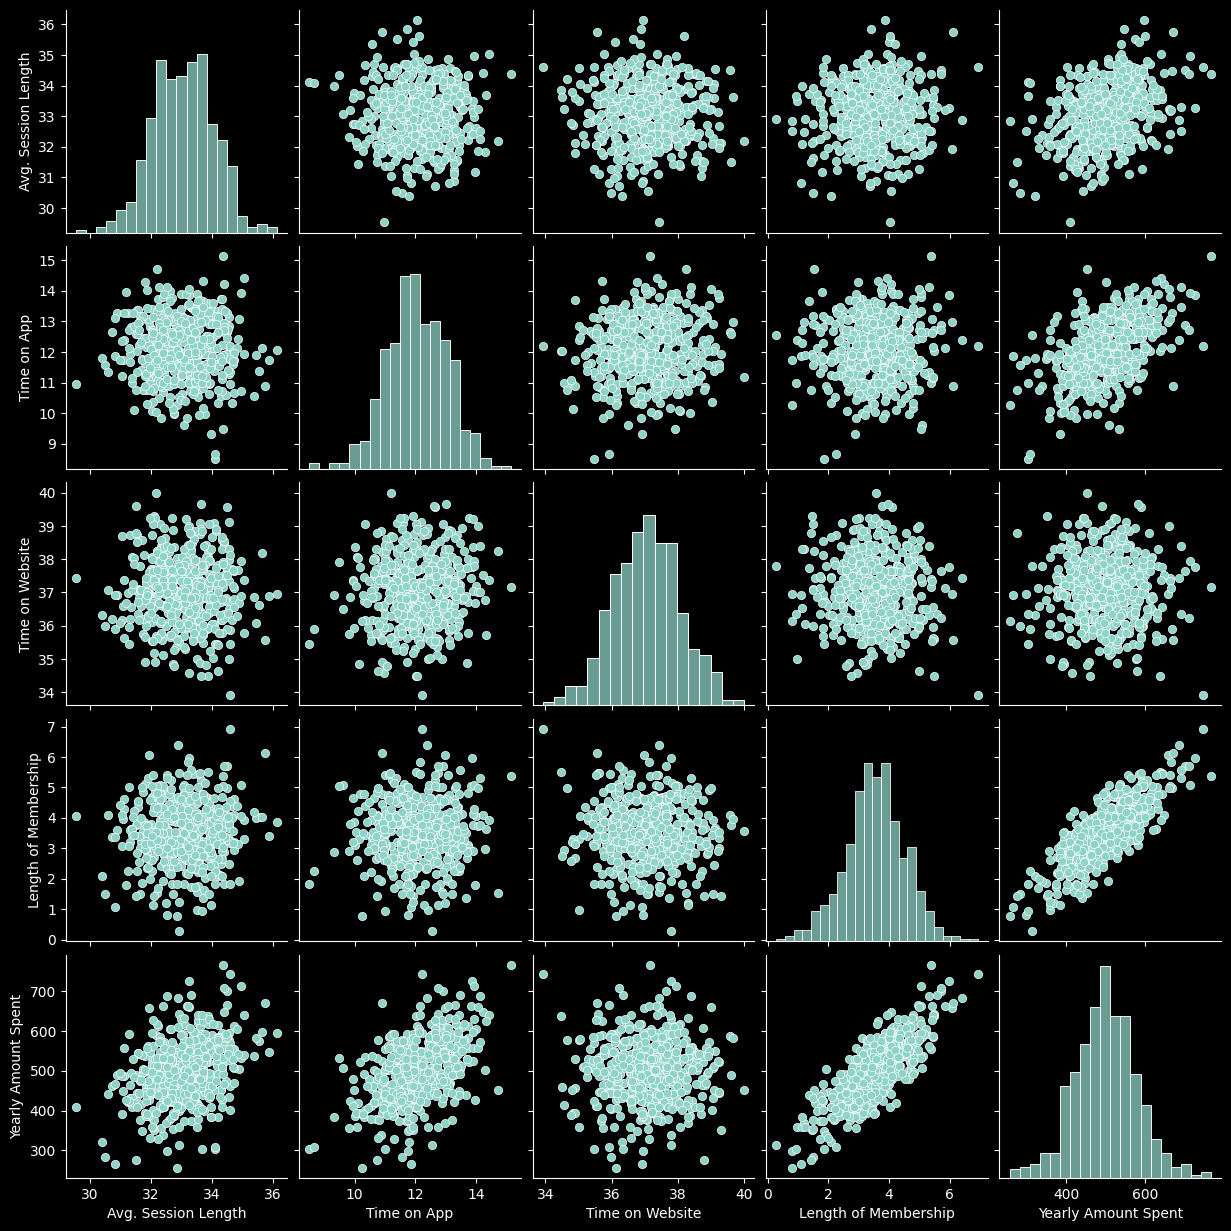

In [5]:
sns.pairplot(data)

In [6]:
data.shape

(500, 8)

In [7]:
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)

In [8]:
X = data.iloc[:,3:-1]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(units = 1, input_shape =(4,), activation = None))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005) ,loss='mse')

In [14]:
history = model.fit(X_train,Y_train, batch_size = 64, epochs = 1500) # Default Batch size = 32, therefore iterations = 800/32 = 25

Epoch 1/1500
7/7 [==============================] - 1s 6ms/step - loss: 245595.6406
Epoch 2/1500
7/7 [==============================] - 0s 4ms/step - loss: 213513.1250
Epoch 3/1500
7/7 [==============================] - 0s 3ms/step - loss: 185744.4219
Epoch 4/1500
7/7 [==============================] - 0s 3ms/step - loss: 161275.4219
Epoch 5/1500
7/7 [==============================] - 0s 3ms/step - loss: 140203.3125
Epoch 6/1500
7/7 [==============================] - 0s 3ms/step - loss: 121795.2578
Epoch 7/1500
7/7 [==============================] - 0s 3ms/step - loss: 105948.2578
Epoch 8/1500
7/7 [==============================] - 0s 3ms/step - loss: 92030.5078
Epoch 9/1500
7/7 [==============================] - 0s 3ms/step - loss: 79990.5469
Epoch 10/1500
7/7 [==============================] - 0s 3ms/step - loss: 69493.8672
Epoch 11/1500
7/7 [==============================] - 0s 3ms/step - loss: 60268.6836
Epoch 12/1500
7/7 [==============================] - 0s 3ms/step - loss: 52389

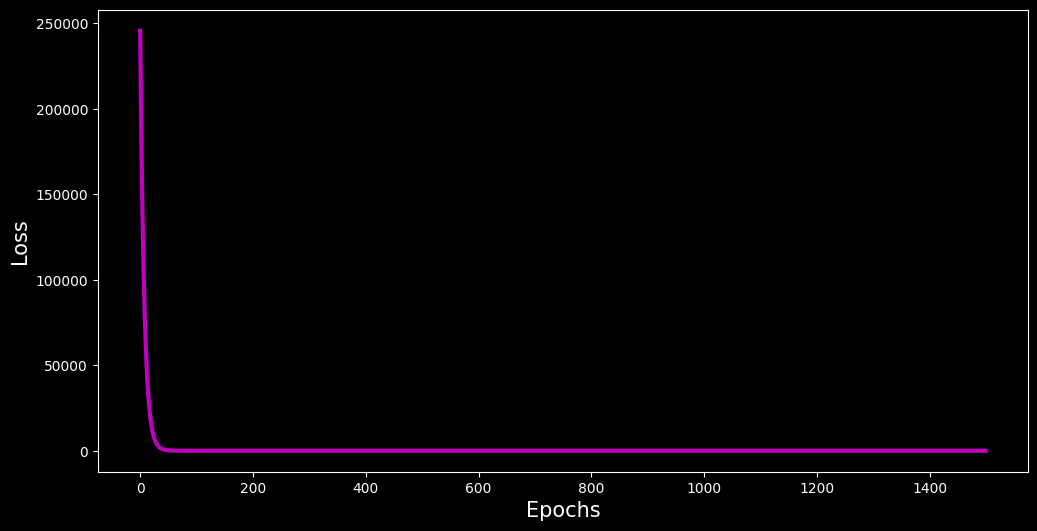

In [15]:
plt.figure(figsize =(12,6))
plt.plot(history.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [16]:
print("Weights are :" )
print(model.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model.layers[0].get_weights()[1])

Weights are :
[[25.191162  ]
 [38.75206   ]
 [ 0.25068456]
 [63.576157  ]]
 
Bias is :
[501.98038]


In [17]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [18]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
print('R2:', metrics.r2_score(Y_test, Y_pred))

RMSE: 10.494984110049295
MAE: 2.9280882122835825
R2: 0.9777563251243317


In [22]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

In [31]:
model = nn.Sequential(
          nn.Linear(4,1),
)

model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [32]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [33]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    Y_pred = model(X_train)
    loss = lossfunc(Y_pred,Y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  258274.23
epochs : 100 loss :  4615.76
epochs : 200 loss :  175.02
epochs : 300 loss :  97.21
epochs : 400 loss :  95.85
epochs : 500 loss :  95.82
epochs : 600 loss :  95.82
epochs : 700 loss :  95.82
epochs : 800 loss :  95.82
epochs : 900 loss :  95.82
epochs : 1000 loss :  95.82


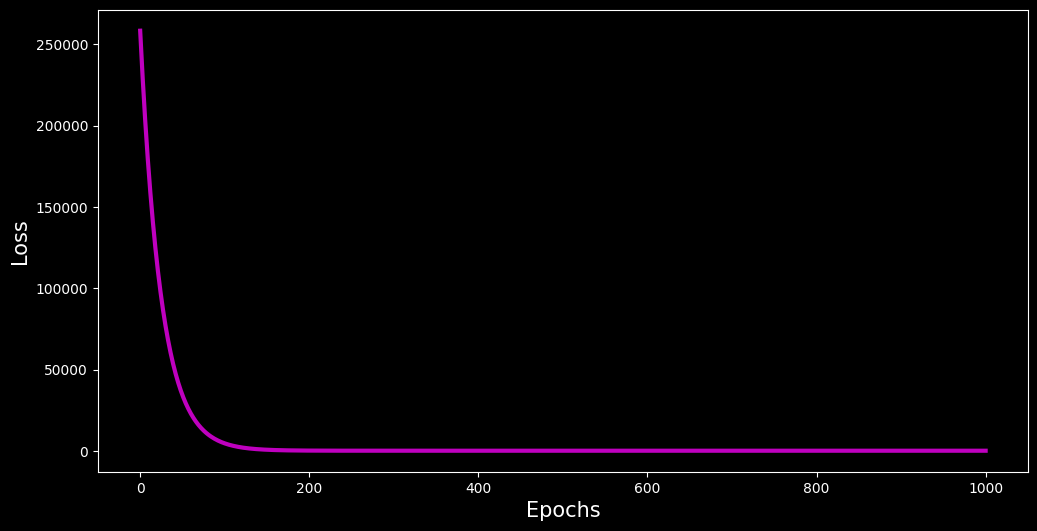

In [34]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [35]:
print(model[0].weight.detach().numpy())
print(model[0].bias.detach().numpy())

[[25.25034    38.70342     0.31547302 63.543125  ]]
[501.9914]


In [36]:
Y_pred = model(X_test)

In [37]:
Y_pred = Y_pred.detach().numpy()
Y_test = Y_test.detach().numpy()

In [38]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))
print('R2:', metrics.r2_score(Y_test, Y_pred))

RMSE: 10.481527
MAE: 2.9254687
R2: 0.9778133296363896
